In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data  
from datetime import datetime
from IPython.display import display

In [130]:
driver = webdriver.Chrome('C:\/chromedriver.exe')
driver.get('https://m.stock.naver.com/index.nhn')

In [131]:
driver.find_element_by_xpath('//*[@id="header"]/div[1]/div[2]/a[1]/span').click()

In [143]:
for i in range(1,2):
    stock=[]
    c
    driver.find_element_by_xpath('//*[@id="searchResult"]/li[{}]/a'.format(i)).click()
    time.sleep(1)
    driver.find_element_by_xpath('//*[@id="common_component_tab"]/div/ul/li[4]/a').click()
    time.sleep(2)
    for i in range(3):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
    driver.find_element_by_xpath('//*[@id="content"]/div[4]/div[3]/div[2]/div/div[3]/a').click()
    time.sleep(1)
    html = driver.page_source
    soup=BeautifulSoup(html, 'html.parser')
    
    for i in soup.select_one('tbody'):
        company=[]
        company.append(driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[1]/div[1]/span[2]').text)
        company.append(i.select('.VTablePrice_td__PZi0o')[0].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[1].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[3].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[4].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[5].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[6].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[7].text)
        
        stock.append(company)
#         print(stock)
    driver.back()
    
    driver.back()
    time.sleep(1)

In [144]:
stock

[['삼성전자',
  '07.14',
  '79,500',
  '-0.38%',
  '79,400',
  '79,600',
  '79,100',
  '11,408,454'],
 ['삼성전자',
  '07.13',
  '79,800',
  '+0.13%',
  '80,000',
  '80,200',
  '79,800',
  '9,863,450'],
 ['삼성전자',
  '07.12',
  '79,700',
  '+0.38%',
  '79,900',
  '80,000',
  '79,500',
  '9,768,108'],
 ['삼성전자',
  '07.09',
  '79,400',
  '-0.63%',
  '79,600',
  '79,800',
  '79,000',
  '22,720,577'],
 ['삼성전자',
  '07.08',
  '79,900',
  '-1.11%',
  '81,100',
  '81,200',
  '79,900',
  '16,660,998'],
 ['삼성전자',
  '07.07',
  '80,800',
  '-0.49%',
  '81,200',
  '81,300',
  '80,300',
  '15,992,202'],
 ['삼성전자',
  '07.06',
  '81,200',
  '+1.00%',
  '80,600',
  '81,200',
  '80,500',
  '12,131,651'],
 ['삼성전자',
  '07.05',
  '80,400',
  '+0.50%',
  '80,100',
  '80,800',
  '80,000',
  '8,330,969'],
 ['삼성전자',
  '07.02',
  '80,000',
  '-0.12%',
  '80,000',
  '80,400',
  '79,900',
  '8,753,097'],
 ['삼성전자',
  '07.01',
  '80,100',
  '-0.74%',
  '80,500',
  '80,600',
  '80,000',
  '13,382,882'],
 ['삼성전자',
  '06.30',
  '

In [27]:
col=['name','date','end','drop_rate','start','high','low','volume']

In [109]:
df = pd.DataFrame(stock,columns=col)

In [110]:
df

,name,date,end,drop_rate,start,high,low,volume
0,인터파크,07.14,"9,020",+29.97%,"7,260","9,020","7,130","114,347,379"
1,인터파크,07.13,"6,940",+22.83%,"7,060","7,340","6,710","74,959,345"
2,인터파크,07.12,"5,650",+6.40%,"5,310","5,650","5,310","4,213,384"
3,인터파크,07.09,"5,310",-1.67%,"5,280","5,370","5,200","1,787,880"
4,인터파크,07.08,"5,400",-2.88%,"5,580","5,650","5,400","1,957,030"
...,...,...,...,...,...,...,...,...
75,인터파크,03.29,"4,940",-2.95%,"5,100","5,160","4,920","3,932,470"
76,인터파크,03.26,"5,090",-1.55%,"5,150","5,170","5,020","3,616,334"
77,인터파크,03.25,"5,170",+5.40%,"4,890","5,220","4,875","11,255,604"
78,인터파크,03.24,"4,905",+0.41%,"4,830","5,030","4,795","1,878,900"


In [111]:
df.to_csv("stock.csv", mode='a',header=True,index=False)

In [112]:
df=pd.read_csv('./stock.csv',thousands=',')

In [113]:
df

,name,date,end,drop_rate,start,high,low,volume
0,인터파크,7.14,9020,+29.97%,7260,9020,7130,114347379
1,인터파크,7.13,6940,+22.83%,7060,7340,6710,74959345
2,인터파크,7.12,5650,+6.40%,5310,5650,5310,4213384
3,인터파크,7.09,5310,-1.67%,5280,5370,5200,1787880
4,인터파크,7.08,5400,-2.88%,5580,5650,5400,1957030
...,...,...,...,...,...,...,...,...
75,인터파크,3.29,4940,-2.95%,5100,5160,4920,3932470
76,인터파크,3.26,5090,-1.55%,5150,5170,5020,3616334
77,인터파크,3.25,5170,+5.40%,4890,5220,4875,11255604
78,인터파크,3.24,4905,+0.41%,4830,5030,4795,1878900


In [116]:
df['MA3'] = df['end'].rolling(3).mean()
df['MA5'] = df['end'].rolling(5).mean()
df['MA10'] = df['end'].rolling(10).mean()
df['MA20'] = df['end'].rolling(20).mean()

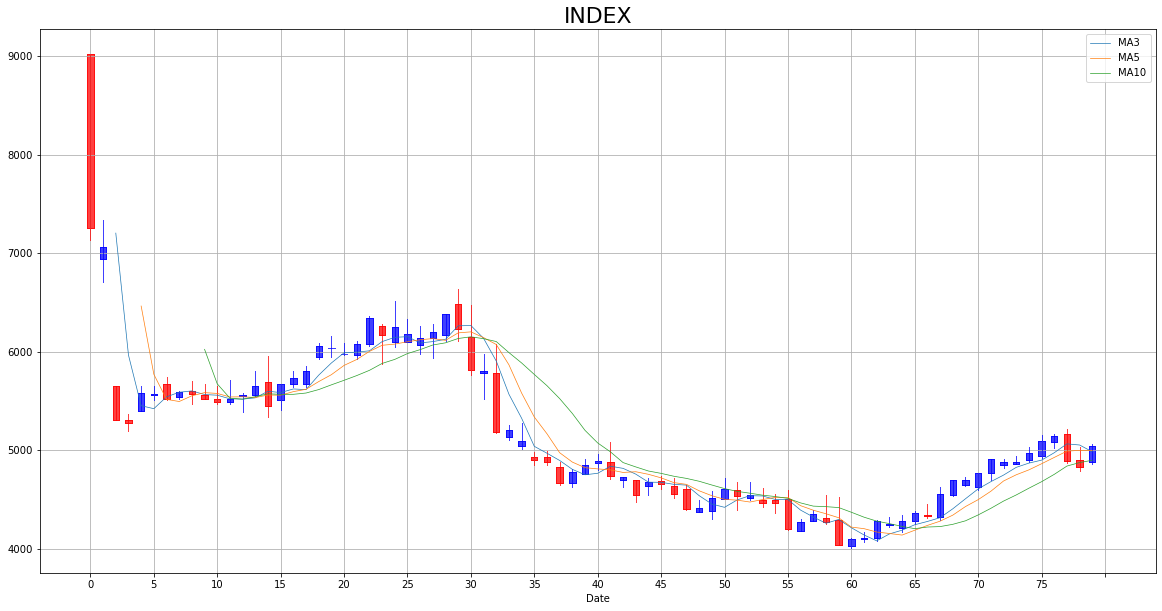

In [118]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
index = df.index.astype('str') # 캔들스틱 x축이 str로 들어감

# 이동평균선 그리기
ax.plot(index, df['MA3'], label='MA3', linewidth=0.7)
ax.plot(index, df['MA5'], label='MA5', linewidth=0.7)
ax.plot(index, df['MA10'], label='MA10', linewidth=0.7)

# X축 티커 숫자 20개로 제한
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

# 그래프 title과 축 이름 지정
ax.set_title('INDEX', fontsize=22)
ax.set_xlabel('Date')

# 캔들차트 그리기
candlestick2_ohlc(ax, df['start'], df['high'], 
                  df['low'], df['end'],
                  width=0.5, colorup='r', colordown='b')
ax.legend()
plt.grid()
plt.show()

In [146]:
info=[]
for i in range(1,3):
    stock=[]
    driver.find_element_by_xpath('//*[@id="searchResult"]/li[{}]/a'.format(i)).click()
    time.sleep(1)
    driver.find_element_by_xpath('//*[@id="common_component_tab"]/div/ul/li[4]/a').click()
    time.sleep(2)
    for i in range(3):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
    driver.find_element_by_xpath('//*[@id="content"]/div[4]/div[3]/div[2]/div/div[3]/a').click()
    time.sleep(1)
    html = driver.page_source
    soup=BeautifulSoup(html, 'html.parser')
    
    for i in soup.select_one('tbody'):
        company=[]
        company.append(driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[1]/div[1]/span[2]').text)
        company.append(i.select('.VTablePrice_td__PZi0o')[0].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[1].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[3].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[4].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[5].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[6].text)
        company.append(i.select('.VTablePrice_td__PZi0o')[7].text)
        
        stock.append(company)
    info.append(stock)
#         print(stock)
    driver.back()
    
    driver.back()
    time.sleep(1)

160